# Verification des pertes de charge regulieres  en VEF

In [1]:
from trustutils import run

run.introduction("P.Q. + G.F.")
run.description("Calculs menes en VEF")
run.TRUST_parameters("")

## Introduction 
 Validation made by : P.Q. + G.F.



 Report generated 27/01/2022

### Description 
Calculs menes en VEF

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/PeChaReg_VEF/build)

In [2]:
c1 = run.addCase("2D_perio"    ,"test.data",nbProcs=1) 
c2 = run.addCase("2D_sym"      ,"test.data",nbProcs=1) 
c3 = run.addCase("3D_perio"    ,"test.data",nbProcs=1) 
c4 = run.addCase("3D_sym"      ,"test.data",nbProcs=1) 
c5 = run.addCase("3D_sym_inout","test.data",nbProcs=1)  
c6 = run.addCase("3D_sym_inout","test_poreux.data",nbProcs=1)  
c7 = run.addCase("3D_sym_inout","test_rotation.data",nbProcs=1) 
run.printCases()
run.runCases()

### Test cases 
* 2D_perio/test.data : 
* 2D_sym/test.data : 
* 3D_perio/test.data : 
* 3D_sym/test.data : 
* 3D_sym_inout/test.data : 
* 3D_sym_inout/test_poreux.data : 
* 3D_sym_inout/test_rotation.data : 


Running **with Sserver**...
  => A total of 7 cases were (successfully) run in 1.8s.


### Evolution de la vitesse 

$Dp/Dy = 0.5 \rho \lambda(Re) U2/Dh$ \
$Dp/Dy = 1$ \
$\rho = 5$ (solution independante de rho) \
$\mu = 4$ \
$Dh = 2$ \
Vitesse ciblee : $U = 2 Dh2/\mu = 2$

### Evolution temporelle de la vitesse

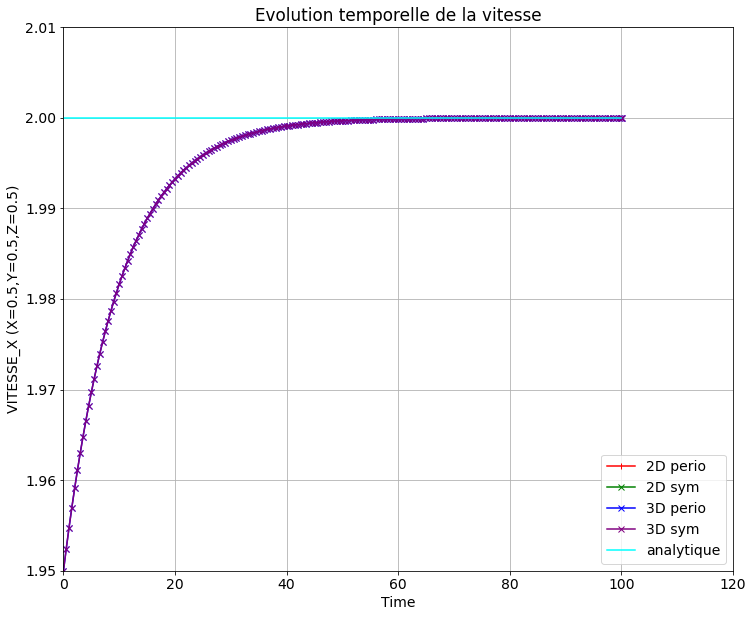

In [3]:
from trustutils import plot
import numpy as np

graphique=plot.Graph("Evolution temporelle de la vitesse") 

graphique.addPoint('./2D_perio/test_VIT.son'   ,marker="-|",color='r'     ,var="x" ,label="2D perio")
graphique.addPoint('./2D_sym/test_VIT.son',marker="-x",color='g'     ,var="x" ,label="2D sym")
graphique.addPoint('./3D_perio/test_VIT.son'   ,marker="-x",color='b'     ,var="z",label="3D perio")
graphique.addPoint('./3D_sym/test_VIT.son',marker="-x",color='purple',var="z",label="3D sym") 
graphique.add(np.linspace(0,100,100),2*np.ones(100), 'cyan',label="analytique")
#graphique.label(['Temps (s)'],['Vitesse (m/s)'])
graphique.visu(0,120,1.95,2.01)

## Verification invariance rotation et effet porosite
$Dp/Dy = 0.5 \rho \lambda(Re) U2/Dh$ \
$\lambda(Re)=Re^{-3}$ \
$\rho = 5$ (solution independante de rho) \
$\mu = 4$ \
$Dh = 2$ \
$U = 2$ \
P vise en entree : $P = 1/2 \rho/Re^3 U^2/D=1/25=4.10^{-2}$
### Valeur de la pression en entree

In [4]:
from trustutils import plot

columns=["pression"]
Table=plot.Table(columns)  
Table.addLigne([[0.04]],"theorie") 
Table.loadPoint("3D_sym_inout/test_P.son","standard")
Table.loadPoint("3D_sym_inout/test_poreux_P.son","poreux")
Table.loadPoint("3D_sym_inout/test_rotation_P.son","rotation")


Table.df

,pression
theorie,0.04
standard,0.04
poreux,0.04
rotation,0.04


## test.data  

In [5]:
run.dumpDataset("2D_perio/test.data")   

 dimension 2
 Pb_Hydraulique pb
 Domaine dom
 
 # BEGIN MESH #
 Mailler dom
 {
 Pave Cavite
         {
                 Origine 0. 0.
                 Nombre_de_Noeuds 4  4 
                 Longueurs 1. 1.
         }
         {
                 Bord periox   X = 0.  0. <= Y <= 1.  
                 Bord periox   X = 1.  0. <= Y <= 1.  
                 Bord bas      Y = 0.  0. <= X <= 1.  
                 Bord haut     Y = 1.  0. <= X <= 1.  
  
                 }
 } 
 
 trianguler_fin dom
 Corriger_frontiere_periodique { domaine dom bord periox }
 
 Sous_zone zone_tout
 Associate zone_tout dom
 Read zone_tout {
           Rectangle
           Origine  -5.  -5.
           Cotes   10. 10. 
           }
 
 
 VEFPreP1b dis
 
 Scheme_euler_explicit sch
 
 Read sch 
 {
         tinit 0.
         tmax 100.
         dt_min 1.e-7
         dt_max 1.e-1
 	 dt_start dt_calc
         dt_impr 0.001
         dt_sauv 20.
         seuil_statio 1.e-8  
         facsec 0.5
 }
 
 Fluide_Incompressible 

## test.data  

In [6]:
run.dumpDataset("2D_sym/test.data")   

 dimension 2
 Pb_Hydraulique pb
 Domaine dom
 
 # BEGIN MESH #
 Mailler dom
 {
 Pave Cavite
         {
                 Origine 0. 0.
                 Nombre_de_Noeuds 4  4 
                 Longueurs 1. 1.
         }
         {
                 Bord sym      X = 0.  0. <= Y <= 1.  
                 Bord sym      X = 1.  0. <= Y <= 1.  
                 Bord bas      Y = 0.  0. <= X <= 1.  
                 Bord haut     Y = 1.  0. <= X <= 1.  
  
                 }
 } 
 
 trianguler_fin dom
 
 Sous_zone zone_tout
 Associate zone_tout dom
 Read zone_tout {
           Rectangle
           Origine  -5.  -5.
           Cotes   10. 10. 
           }
 
 
 VEFPreP1b dis
 
 Scheme_euler_explicit sch
 
 Read sch 
 {
         tinit 0.
         tmax 100.
         dt_min 1.e-7
         dt_max 1.e-1
 	 dt_start dt_calc
         dt_impr 0.001
         dt_sauv 20.
         seuil_statio 1.e-8  
         facsec 0.5
 }
 
 Fluide_Incompressible fluide
 Read fluide
 {
 	 mu Champ_Uniforme 1 4.
 	 rho Cha

## test.data  

In [7]:
run.dumpDataset("3D_perio/test.data")   

 dimension 3
 Pb_Hydraulique pb
 Domaine dom
 
 # BEGIN MESH #
 Mailler dom
 {
 Pave Cavite
         {
                 Origine 0. 0. 0.
                 Nombre_de_Noeuds 3  3  3 
                 Longueurs 1. 1. 1.
         }
         {
                 Bord periox   X = 0.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord periox   X = 1.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord perioy   Y = 0.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord perioy   Y = 1.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord bas      Z = 0.  0. <= X <= 1.  0. <= Y <= 1.
                 Bord haut     Z = 1.  0. <= X <= 1.  0. <= Y <= 1.
  
                 }
 } 
 
 tetraedriser_homogene_fin dom
 Corriger_frontiere_periodique { domaine dom bord periox }
 Corriger_frontiere_periodique { domaine dom bord perioy }
 
 Sous_zone zone_tout
 Associate zone_tout dom
 Read zone_tout {
           Boite
           Origine  -5.  -5. -5.
           Cotes   10. 10. 10. 
           }
 
 
 VEFPreP

## test.data  

In [8]:
run.dumpDataset("3D_sym/test.data")   

 dimension 3
 Pb_Hydraulique pb
 Domaine dom
 
 # BEGIN MESH #
 Mailler dom
 {
 Pave Cavite
         {
                 Origine 0. 0. 0.
                 Nombre_de_Noeuds 3  3  3 
                 Longueurs 1. 1. 1.
         }
         {
                 Bord sym      X = 0.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord sym      X = 1.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord sym      Y = 0.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord sym      Y = 1.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord bas      Z = 0.  0. <= X <= 1.  0. <= Y <= 1.
                 Bord haut     Z = 1.  0. <= X <= 1.  0. <= Y <= 1.
  
                 }
 } 
 
 tetraedriser_homogene_fin dom
 
 Sous_zone zone_tout
 Associate zone_tout dom
 Read zone_tout {
           Boite
           Origine  -5.  -5. -5.
           Cotes   10. 10. 10. 
           }
 
 
 VEFPreP1b dis
 
 Scheme_euler_explicit sch
 
 Read sch 
 {
         tinit 0.
         tmax 100.
         dt_min 1.e-7
       

## test.data 

In [9]:
run.dumpDataset("3D_sym_inout/test.data")   

 dimension 3
 Pb_Hydraulique pb
 Domaine dom
 
 
 Mailler dom
 {
 Pave Cavite
         {
                 Origine 0. 0. 0.
                 Nombre_de_Noeuds 3  3  3 
                 Longueurs 1. 1. 1.
         }
         {
                 Bord sym      X = 0.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord sym      X = 1.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord sym      Y = 0.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord sym      Y = 1.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord bas      Z = 0.  0. <= X <= 1.  0. <= Y <= 1.
                 Bord haut     Z = 1.  0. <= X <= 1.  0. <= Y <= 1.
  
                 }
 } 
 transformer dom x-0.5 y-0.5 z
 tetraedriser_homogene_fin dom
 
 # marqueur #
 
 Sous_zone zone_tout
 Associate zone_tout dom
 Read zone_tout {
           Boite
           Origine  -5.  -5. -5.
           Cotes   10. 10. 10. 
           }
 
 
 VEFPreP1b dis
 
 Scheme_euler_explicit sch
 
 Read sch 
 {
         tinit 0.
         tmax 100

## test_poreux.data 

In [10]:
run.dumpDataset("3D_sym_inout/test_poreux.data")   

 dimension 3
 Pb_Hydraulique pb
 Domaine dom
 
 
 Mailler dom
 {
 Pave Cavite
         {
                 Origine 0. 0. 0.
                 Nombre_de_Noeuds 3  3  3 
                 Longueurs 1. 1. 1.
         }
         {
                 Bord sym      X = 0.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord sym      X = 1.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord sym      Y = 0.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord sym      Y = 1.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord bas      Z = 0.  0. <= X <= 1.  0. <= Y <= 1.
                 Bord haut     Z = 1.  0. <= X <= 1.  0. <= Y <= 1.
  
                 }
 } 
 transformer dom x-0.5 y-0.5 z
 tetraedriser_homogene_fin dom
 
 # marqueur #
 
 Sous_zone zone_tout
 Associate zone_tout dom
 Read zone_tout {
           Boite
           Origine  -5.  -5. -5.
           Cotes   10. 10. 10. 
           }
 
 
 VEFPreP1b dis
 
 Scheme_euler_explicit sch
 
 Read sch 
 {
         tinit 0.
         tmax 100

## test_rotation.data 

In [11]:
run.dumpDataset("3D_sym_inout/test_rotation.data")   

 dimension 3
 Pb_Hydraulique pb
 Domaine dom
 
 
 Mailler dom
 {
 Pave Cavite
         {
                 Origine 0. 0. 0.
                 Nombre_de_Noeuds 3  3  3 
                 Longueurs 1. 1. 1.
         }
         {
                 Bord sym      X = 0.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord sym      X = 1.  0. <= Y <= 1.  0. <= Z <= 1. 
                 Bord sym      Y = 0.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord sym      Y = 1.  0. <= X <= 1.  0. <= Z <= 1. 
                 Bord bas      Z = 0.  0. <= X <= 1.  0. <= Y <= 1.
                 Bord haut     Z = 1.  0. <= X <= 1.  0. <= Y <= 1.
  
                 }
 } 
 transformer dom x-0.5 y-0.5 z
 tetraedriser_homogene_fin dom
 
 transformer dom (x+y)/sqrt(2) (x-y)/sqrt(2) z transformer dom x (y+z)/sqrt(2) (y-z)/sqrt(2) transformer dom  (x+z)/sqrt(2) y (x-z)/sqrt(2)
 
 Sous_zone zone_tout
 Associate zone_tout dom
 Read zone_tout {
           Boite
           Origine  -5.  -5. -5.
           Cotes  